Linear regression study with synthetic data.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from numpy.random import uniform, normal

## Synthetic data generation

Write a function that generates $M$ instances of data with $N$ features. The target function is linear in the features with some Gaussian noise added.

In [30]:
def generate_data(M,N,theta,xmin=0,xmax=1,sigmay=1):
    """
    Generates synthetic data for linear regression.
  
    For each feature i, the feature values x_i are generated randomly between xmin[i] and xmax[i].
    The target variable y is a linear function of x_i with parameters theta, with a Gaussian noise added.
    
    y = theta_0 + theta_1 * x_1 + ... + theta_N * x_N + normal(0,sigmay)
    
    Parameters:
    
    M: Number of instances
    N: Number of features
    theta: the array of parameters (N+1 elements)
    xmin[i]: Minimum value of feature i. If scalar, same value is used for each feature.
    xmax[i]: Maximum value of feature i. If scalar, same value is used for each feature.
    sigmay: The standard deviation of the noise.
    
    Output:
    X_out: Design matrix
    y_out: Target array
    """
    if type(xmin)==int or type(xmin)==float:
        xmin = [xmin]*N
    if type(xmax)==int or type(xmax)==float:
        xmax = [xmax]*N

    assert len(xmin) == N
    assert len(xmax) == N
    assert len(theta) == N+1
    
    X_out = np.zeros((M,N+1))
    y_out = np.zeros(M)
    
    for m in range(M):
        x = [1] + [ uniform(xmin[i],xmax[i],1) for i in range(N) ]
        y = np.dot(x,theta) + normal(0,sigmay,1)
        X_out[m,:] = x
        y_out[m] = y
    
    return X_out, y_out

Try it: Generate 50 data points with $y=2x+1+N(0,0.2)$

In [56]:
X,y = generate_data(50,1,sigmay=0.2,theta=[1,2])

Display the data points and the underlying model.

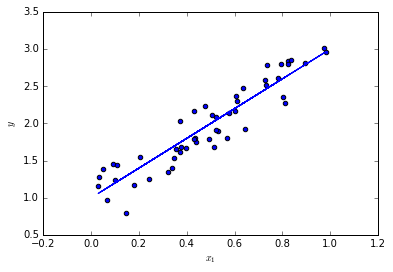

In [57]:
pl.scatter(X[:,1],y)
pl.plot(X[:,1], np.dot(X,[1,2]))
pl.xlabel("$x_1$")
pl.ylabel("$y$")

## Linear regression

The linear model $h_\theta(X) = X\theta$

In [75]:
def model(X, theta):
    """
    The linear model h(x) = theta_0 + theta_1*x_1 + theta_2*x_2 + ... theta_N*x_N
    X: The design matrix (M-by-(N+1), first column all 1's).
    theta: The parameter array (theta_0, theta_1, ..., theta_N)
    
    Returns:
    The array of model values, h = X.theta
    """
    assert X.shape[1] == len(theta)
    return np.dot(X,theta)

In [71]:
def cost(X, theta, y):
    """
    The cost function J(theta) = ||h(theta,X) - y||^2 / (2m)
    """
    m = len(y)
    diff = model(X,theta) - y
    return np.dot(diff, diff)/(2*m)

In [120]:
def gradient_descent(X, y, theta_0, alpha, eps = 1e-3, maxiter=1000):
    i = 0
    m = X.shape[0]
    J = [cost(X,theta_0,y)]
    while True:
        i += 1
        h = model(X, theta_0)
        theta = theta_0 - (alpha/m)*np.dot(np.transpose(h-y),X)
        J += [cost(X, theta, y)]
        diff = theta - theta_0
        if np.dot(diff,diff) < eps**2:
            break
        if i >= maxiter:
            print("Maximum iteration reached.")
            return None, J
        theta_0 = theta
    return theta, J

In [129]:
theta, J = gradient_descent(X,y,[2,3], 0.03)

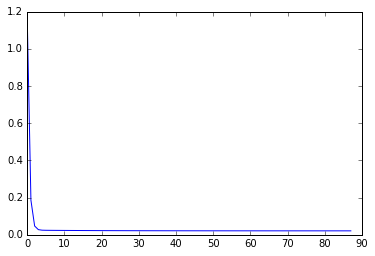

In [130]:
pl.plot(J)

Plot the data, original line, and the regression line.

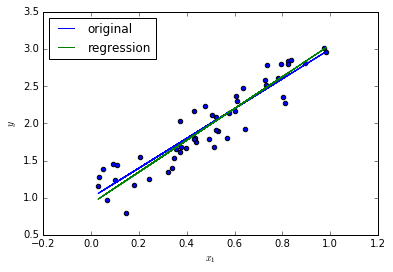

In [89]:
pl.scatter(X[:,1],y)
pl.plot(X[:,1], np.dot(X,[1,2]), label="original")
pl.plot(X[:,1], np.dot(X,th),label="regression")
pl.xlabel("$x_1$")
pl.ylabel("$y$")
pl.legend(loc="upper left");

Solve using the normal equation and compare.

In [91]:
from numpy.linalg import inv
theta_n = np.dot(np.dot(inv(np.dot(np.transpose(X),X)), np.transpose(X)),y)

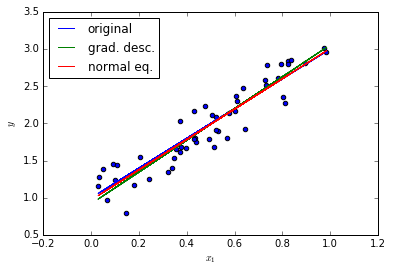

In [92]:
pl.scatter(X[:,1],y)
pl.plot(X[:,1], np.dot(X,[1,2]), label="original")
pl.plot(X[:,1], np.dot(X,th),label="grad. desc.")
pl.plot(X[:,1], np.dot(X,theta_n),label="normal eq.")
pl.xlabel("$x_1$")
pl.ylabel("$y$")
pl.legend(loc="upper left");

## Contours of the cost function and iteration steps

Plot the contours of the cost function $J(\theta_0, \theta_1)$ in $(\theta_0,\theta_1)$ space.

In [137]:
theta_0 = np.linspace(-3,4,50)
theta_1 = np.linspace(-2,6,50)
t0, t1 = np.meshgrid(theta_0,theta_1)
J = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        J[i,j] = cost(X, [t0[i,j], t1[i,j]], y)

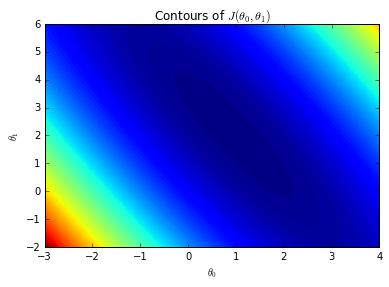

In [150]:
pl.contourf(t0,t1,J,100)
pl.xlabel(r"$\theta_0$")
pl.ylabel(r"$\theta_1$")
pl.title("Contours of " + r"$J( \theta_0, \theta_1)$");

Modify the gradient descent function to output the intermediate parameters.

In [263]:
def gradient_descent(X, y, theta_0, alpha, eps = 1e-5, maxiter=1000):
    i = 0
    m = X.shape[0]
    theta_array = [theta_0]
    J = [cost(X,theta_0,y)]
    while True:
        i += 1
        h = model(X, theta_0)
        theta = theta_0 - (alpha/m)*np.dot(np.transpose(h-y),X)
        J += [cost(X, theta, y)]
        theta_array += [theta]
        diff = abs(J[-1] - J[-2])
        if diff < eps:
            break
        if i >= maxiter:
            print("Maximum iteration reached.")
            break
        theta_0 = theta
    return np.array(theta_array), J

In [264]:
theta, J = gradient_descent(X,y,[3,5], 1)

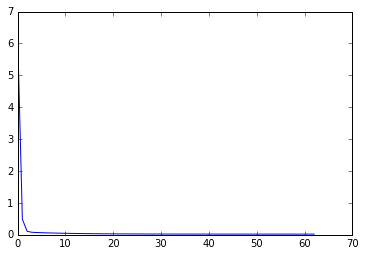

In [265]:
pl.plot(J);

In [266]:
theta_0 = np.linspace(-3,4,50)
theta_1 = np.linspace(-2,6,50)
t0, t1 = np.meshgrid(theta_0,theta_1)
J = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        J[i,j] = cost(X, [t0[i,j], t1[i,j]], y)

Plot the contours and the gradient-descent steps.

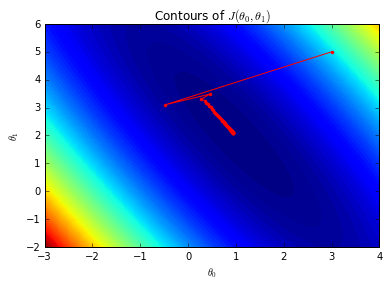

In [262]:
pl.contourf(t0,t1,J,100)
pl.xlabel(r"$\theta_0$")
pl.ylabel(r"$\theta_1$")
pl.title("Contours of " + r"$J( \theta_0, \theta_1)$");
pl.plot(theta[:,0],theta[:,1],"r.-");